In [1]:
import numpy as np


X = 6 * np.random.rand(100, 1)
y = 2 + 8 * X + np.random.randn(100, 1)

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
X_b = np.c_[np.ones((100,1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[2.04099022],
       [7.97232285]])

In [5]:
X

array([[4.66746508],
       [3.97727548],
       [5.46223663],
       [1.36501659],
       [4.67877972],
       [3.49088431],
       [1.98981282],
       [0.67045661],
       [3.08057146],
       [0.05861028],
       [1.2892318 ],
       [3.90929088],
       [0.21520781],
       [2.43689087],
       [2.68942649],
       [1.96613289],
       [3.55531073],
       [0.33674906],
       [0.77293508],
       [2.39869666],
       [1.02189334],
       [4.45744992],
       [1.11622563],
       [2.29728485],
       [3.06644685],
       [2.88869455],
       [2.27910357],
       [3.21619754],
       [1.86354452],
       [4.11156324],
       [5.82491728],
       [3.69222266],
       [1.53663356],
       [1.53925797],
       [4.46220891],
       [3.16317758],
       [1.95565302],
       [3.2261284 ],
       [5.76061528],
       [3.28533629],
       [2.32239906],
       [4.40445415],
       [4.09956714],
       [1.88118166],
       [2.03222031],
       [4.38365311],
       [2.83922602],
       [5.858

In [6]:
X_b

array([[1.        , 4.66746508],
       [1.        , 3.97727548],
       [1.        , 5.46223663],
       [1.        , 1.36501659],
       [1.        , 4.67877972],
       [1.        , 3.49088431],
       [1.        , 1.98981282],
       [1.        , 0.67045661],
       [1.        , 3.08057146],
       [1.        , 0.05861028],
       [1.        , 1.2892318 ],
       [1.        , 3.90929088],
       [1.        , 0.21520781],
       [1.        , 2.43689087],
       [1.        , 2.68942649],
       [1.        , 1.96613289],
       [1.        , 3.55531073],
       [1.        , 0.33674906],
       [1.        , 0.77293508],
       [1.        , 2.39869666],
       [1.        , 1.02189334],
       [1.        , 4.45744992],
       [1.        , 1.11622563],
       [1.        , 2.29728485],
       [1.        , 3.06644685],
       [1.        , 2.88869455],
       [1.        , 2.27910357],
       [1.        , 3.21619754],
       [1.        , 1.86354452],
       [1.        , 4.11156324],
       [1.

In [7]:
X_new = np.array([[0], [6]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 2.04099022],
       [49.87492731]])

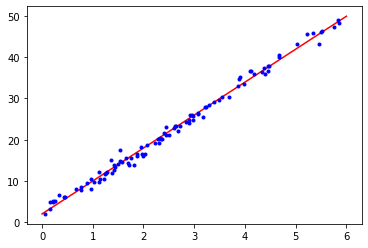

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"b.")

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.04099022]), array([[7.97232285]]))

In [10]:
lin_reg.predict(X_new)

array([[ 2.04099022],
       [49.87492731]])

In [11]:
#Gradient Descent

In [12]:
eta = 0.02 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [13]:
theta

array([[2.0409472 ],
       [7.97233565]])

In [14]:
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients